In [ ]:
!git clone https://github.com/iglu-contest/iglu
!apt-get -qq install openjdk-8-jdk xvfb > /dev/null
!update-alternatives --config java
!sudo add-apt-repository ppa:openjdk-r/ppa
!sudo apt-get update
!sudo apt-get install openjdk-8-jdk
!sudo apt-get install xvfb
!pip uninstall -y iglu && pip install git+https://github.com/iglu-contest/iglu.git
!pip install gym==0.18.3

In [3]:
# exec this cell ONLY in colab
!wget -q https://raw.githubusercontent.com/iglu-contest/tutorials/main/env/colab_setup.sh -O - | sh > /dev/null 2>&1
!pip install -q pyvirtualdisplay
from pyvirtualdisplay import Display
disp = Display(backend="xvnc", size=(800, 600))
disp.start();
# for local notebooks instead launch jupyter as: xvfb-run -s "-screen 0 640x480x24" jupyter ...

In [6]:
import iglu
import gym
env = gym.make('IGLUSilentBuilder-v0')
obs = env.reset()

In [8]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image
import numpy as np
total_reward = 0.
done = False
images = []

for i in range(10):
  obs = env.reset()
  done = False
  while not done:
    display(Image.fromarray(obs['pov'],).resize((256, 256)))
    action = env.action_space.sample()
    # action['camera'][0] *= 0.1
    # action['camera'][0] *= 0.3
    obs, reward, done, info = env.step(action)
    images.append(obs['pov'])
    total_reward += reward
    clear_output(wait=True)
  print(i)
len(images)

In [ ]:
images = np.asarray(images)

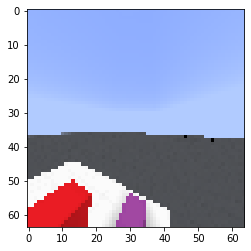

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[0])

In [ ]:
np.save('images.npy',images)